## [Bitcoin Price Prediction - Group 39]
<h4>
Group Members:<br>
Uğur Öztunç <br>
Meriç Mert Bulca <br>
Arda Baydar <br>
Ege Sezginer

## Introduction

<font color="white">
<h3>In this project, we made inferences about famous cryptocurrency Bitcoin, such as how its price is affected by various factors, and make predictions about Bitcoin by utilizing the information we attain, eventually. In the first step, we have explored various datasets in order to find out correlations between different factors about BTC. After that we have analyzed these findings for making proper hypothesises in the following step. In the second step, we formed our hypothesis and test it in order to determine whether it is plausible or not. In final step, we have implemented different machine learning models to analyze the relevancy between factors about BTC and its price, and to make some predictions about BTC price by using the information that we have found out.  
</font>

### Utilized Datasets

<font color="cyan">
https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing?resource=download
</font> <br>
<font color="cyan">https://www.kaggle.com/c/bitcoin/data</font> <br>
<font color="cyan">https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data</font> <br>
<font color="cyan"> https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory</font> <br>
<font color="cyan"> https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd</font>

## ***Exploratory Data Analysis***

In [178]:
#REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [179]:
#MOUNTING TO DRIVE
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/MyDrive"

Mounted at ./drive


###Visualizations Descriptive Statistics

In [180]:
data_file = "BTC-USD.csv"
path = join(path_prefix, data_file)
main = pd.read_csv(path)
print(main.describe())
print(main.dtypes)

               Open          High           Low         Close     Adj Close  \
count   2755.000000   2755.000000   2755.000000   2755.000000   2755.000000   
mean   11768.664114  12082.896368  11425.227294  11783.725409  11783.725409   
std    16405.233671  16841.443821  15910.212812  16413.271203  16413.271203   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      609.777497    612.311005    606.981994    609.804504    609.804504   
50%     6380.379883   6504.649902   6297.930176   6385.819824   6385.819824   
75%    10795.780762  11047.681152  10485.476074  10788.915528  10788.915528   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.755000e+03  
mean   1.489443e+10  
std    1.994140e+10  
min    5.914570e+06  
25%    8.172330e+07  
50%    5.262698e+09  
75%    2.512467e+10  
max    3.509679e+11  
Date          object
Open         float64
High         float64
Low          float64
Close 

In [181]:
#we need plot of differences
main['high_dif_low'] = main['High'] - main['Low']
main['close_dif_open'] = main['Close'] - main['Open']

#print(main.head())
#print(main.tail())
main.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2755 non-null   object 
 1   Open            2755 non-null   float64
 2   High            2755 non-null   float64
 3   Low             2755 non-null   float64
 4   Close           2755 non-null   float64
 5   Adj Close       2755 non-null   float64
 6   Volume          2755 non-null   int64  
 7   high_dif_low    2755 non-null   float64
 8   close_dif_open  2755 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 193.8+ KB


<h4>It can be seen from the info section that there is no null values in data set

In [182]:
#variables
dif_hl = main['high_dif_low']
date = main['Date']
dif_co = main['close_dif_open']
div = 365

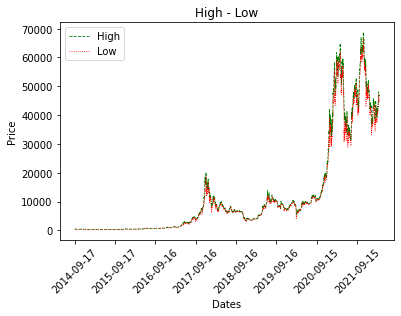

In [186]:
#ploting High and Low prices
plt.plot(date, main['High'], color="green", linewidth=0.8, linestyle="--",label="High")
plt.plot(date, main['Low'], color="red", linewidth=0.8, linestyle=":", label="Low" )
plt.xticks(date[::div], rotation = 45 )

plt.title("High - Low")
plt.xlabel('Dates')
plt.ylabel('Price')

plt.legend()

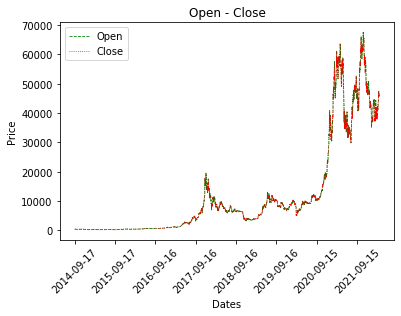

In [187]:
#Ploting Open and Close prices
plt.plot(date, main['Open'], color="green", linewidth=0.8, linestyle="--" ,label="Open" )
plt.plot(date, main['Close'], color="red", linewidth=0.8, linestyle=":" ,label="Close")
plt.xticks(date[::div], rotation = 45 )

plt.title("Open - Close")
plt.xlabel('Dates')
plt.ylabel('Price')

plt.legend()

<h4>Since differences between (high-low and open-close) prices are not visible enough on the plots we decideed to plot the differences as well.

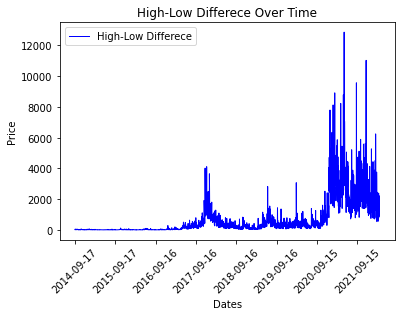

In [188]:
plt.plot(date, dif_hl, color="blue", linewidth=1.0, linestyle="-" , label="High-Low Differece")
plt.xticks(date[::div], rotation = 45  )

plt.title("High-Low Differece Over Time")
plt.xlabel('Dates')
plt.ylabel('Price')

plt.legend()

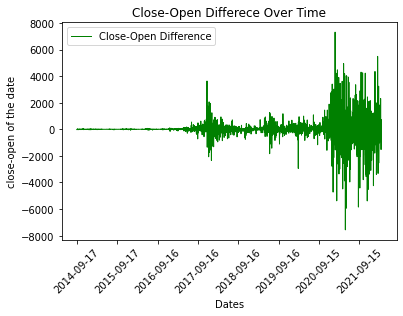

In [189]:
plt.plot(date, dif_co, color="green", linewidth=1.0, linestyle="-" , label="Close-Open Difference")
plt.xticks(date[::div], rotation = 45 )

plt.title("Close-Open Differece Over Time")
plt.xlabel('Dates')
plt.ylabel('close-open of the date')

plt.legend()

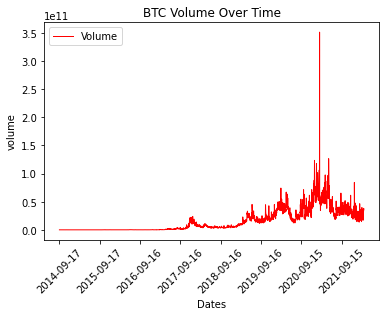

In [190]:
plt.plot(date, main['Volume'], color="red", linewidth=1.0, linestyle="-" , label="Volume")
plt.xticks(date[::div], rotation = 45 )

plt.title("BTC Volume Over Time")
plt.xlabel('Dates')
plt.ylabel('volume')

plt.legend()

<h4>It can be seen from the graphichs that flactiations in bitcoin stocks increased over time until end of 2020's. On the other hand there are some outliers in data. research on these outliers may open ways to new hypothesis so its important to see them in charts for now.

<h4>There is positive correlation between High Low prices with volume  

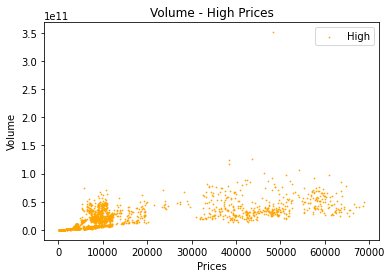

In [13]:
main.sort_values(by=['Volume'])

plt.scatter( main['High'] , main['Volume'], color="orange", s= 0.5 , label="High")

plt.title("Volume - High Prices")
plt.xlabel('Prices')
plt.ylabel('Volume')

plt.legend()

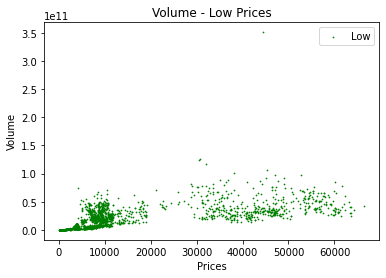

In [14]:
plt.scatter( main['Low'] , main['Volume'], color="Green", s= 0.5 ,label="Low")

plt.title("Volume - Low Prices")
plt.xlabel('Prices')
plt.ylabel('Volume')

plt.legend()

In [15]:
#This data set shows the change in bitcoin prices during the day.
data_file = "BTC-2017min.csv"
path = join(path_prefix, data_file)
btcMin=pd.read_csv(path)
btcMin.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,5.255990e+05,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,1.498997e+09,3948.408377,3952.208189,3943.751886,3948.339307,8.939796,4.143441e+04
std,9.103650e+06,3936.757966,3942.382649,3929.589942,3936.695963,20.779163,1.173633e+05
min,1.483229e+09,752.000000,752.810000,751.340000,752.040000,0.000000,0.000000e+00
25%,1.491113e+09,1197.450000,1197.980000,1197.040000,1197.460000,0.348564,7.167660e+02
50%,1.498997e+09,2567.440000,2569.370000,2565.350000,2567.170000,2.575998,7.249086e+03
75%,1.506881e+09,4535.565000,4539.405000,4531.030000,4535.000000,9.416233,3.294400e+04
max,1.514765e+09,19665.760000,19666.000000,19649.960000,19665.750000,1616.060001,5.145939e+06


In [16]:
data_file = "BTC-2017min.csv"
path = join(path_prefix, data_file)
dmin = pd.read_csv(path)
print(dmin.describe())
print(dmin.dtypes)

               unix           open           high            low  \
count  5.255990e+05  525599.000000  525599.000000  525599.000000   
mean   1.498997e+09    3948.408377    3952.208189    3943.751886   
std    9.103650e+06    3936.757966    3942.382649    3929.589942   
min    1.483229e+09     752.000000     752.810000     751.340000   
25%    1.491113e+09    1197.450000    1197.980000    1197.040000   
50%    1.498997e+09    2567.440000    2569.370000    2565.350000   
75%    1.506881e+09    4535.565000    4539.405000    4531.030000   
max    1.514765e+09   19665.760000   19666.000000   19649.960000   

               close     Volume BTC    Volume USD  
count  525599.000000  525599.000000  5.255990e+05  
mean     3948.339307       8.939796  4.143441e+04  
std      3936.695963      20.779163  1.173633e+05  
min       752.040000       0.000000  0.000000e+00  
25%      1197.460000       0.348564  7.167660e+02  
50%      2567.170000       2.575998  7.249086e+03  
75%      4535.000000   

it can be seen from the info section that there is no null values in data set

In [17]:
#we need plot of differences
dmin['high_dif_low'] = dmin['high'] - dmin['low']
dmin['close_dif_open'] = dmin['close'] - dmin['open']
dmin.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525599 entries, 0 to 525598
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   unix            525599 non-null  int64  
 1   date            525599 non-null  object 
 2   symbol          525599 non-null  object 
 3   open            525599 non-null  float64
 4   high            525599 non-null  float64
 5   low             525599 non-null  float64
 6   close           525599 non-null  float64
 7   Volume BTC      525599 non-null  float64
 8   Volume USD      525599 non-null  float64
 9   high_dif_low    525599 non-null  float64
 10  close_dif_open  525599 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.1+ MB


In [18]:
#variables
dmdif_hl = dmin['high_dif_low']
dmdate = dmin['date']
dmdif_co = dmin['close_dif_open']
div = 52560

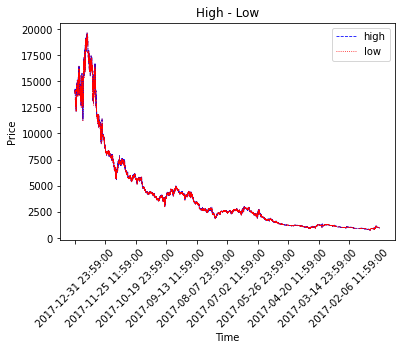

In [19]:
#ploting High and Low prices
plt.plot(dmdate, dmin['high'], color="blue", linewidth=0.8, linestyle="--",label="high")
plt.plot(dmdate, dmin['low'], color="red", linewidth=0.8, linestyle=":", label="low" )
plt.xticks(dmdate[::div], rotation = 45 )

plt.title("High - Low")
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

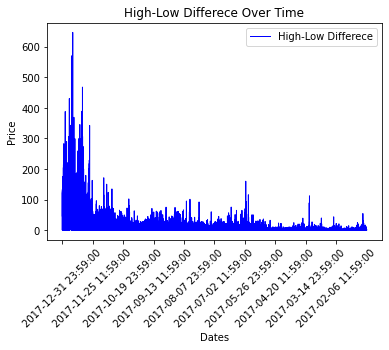

In [20]:
plt.plot(dmdate, dmdif_hl, color="blue", linewidth=1.0, linestyle="-" , label="High-Low Differece")
plt.xticks(dmdate[::div], rotation = 45  )

plt.title("High-Low Differece Over Time")
plt.xlabel('Dates')
plt.ylabel('Price')

plt.legend()

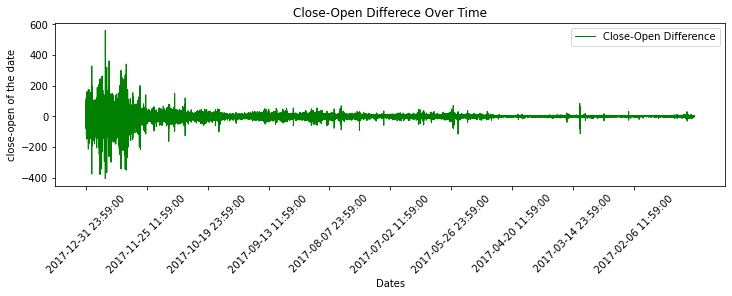

In [90]:
plt.plot(dmdate, dmdif_co, color="green", linewidth=1.0, linestyle="-" , label="Close-Open Difference")
plt.xticks(dmdate[::div], rotation = 45 )

plt.title("Close-Open Differece Over Time")
plt.xlabel('Dates')
plt.ylabel('close-open of the date')

plt.legend()

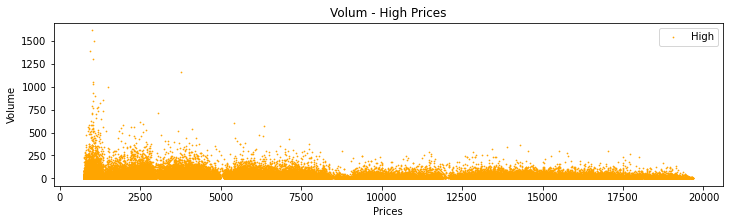

In [91]:
dmin.sort_values(by=['Volume BTC'])

plt.scatter( dmin['high'] , dmin['Volume BTC'], color="orange", s= 0.5 , label="High")

plt.title("Volum - High Prices")
plt.xlabel('Prices')
plt.ylabel('Volume')

plt.legend()

No handles with labels found to put in legend.


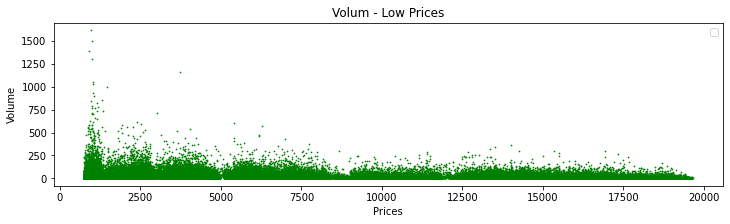

In [92]:
plt.scatter( dmin['low'] , dmin['Volume BTC'], color="Green", s= 0.5 )

plt.title("Volum - Low Prices")
plt.xlabel('Prices')
plt.ylabel('Volume')

plt.legend()

In [93]:
data_file = "coin_Aave.csv"
path = join(path_prefix, data_file)
cAave=pd.read_csv(path)
cAave.describe()
#DESCRIPTIVE STATS OF AAVE COIN

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


In [94]:
cAave.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [95]:
cAave.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [96]:
tick = 30
cAave["Date"] = pd.to_datetime(cAave["Date"])
main["Date"] = pd.to_datetime(main["Date"])
idxed_btc = main.set_index("Date")
dates = cAave["Date"].dt.strftime("%Y-%m-%d")
btc_dates = main["Date"].dt.strftime("%Y-%m-%d")

###Visualizations of Aggregated Forms Based on Features and Analysis of the correlations

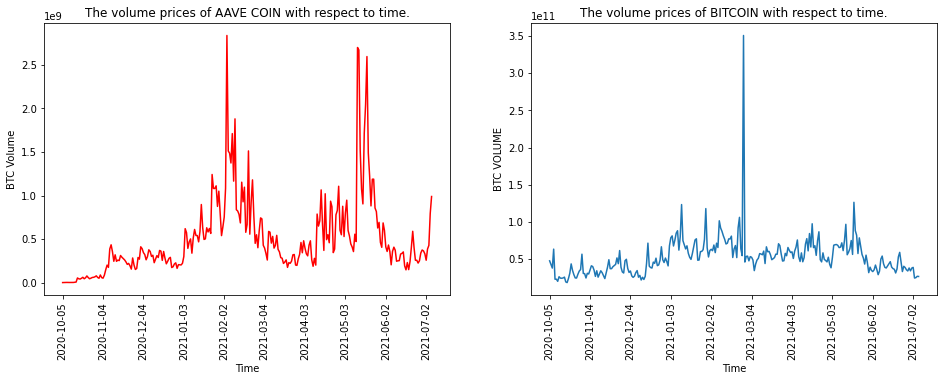

<Figure size 864x360 with 0 Axes>

In [97]:
fig, (axs1,axs2) = plt.subplots(1,2,figsize=(16,5))
cAave_volume = cAave["Volume"]
btc_volume = idxed_btc.loc['2020-10-05':'2021-07-06']["Volume"]
plt.figure(figsize=(12,5))
axs1.plot(dates, cAave_volume, color="red")
axs1.set_xticks(dates[::tick])
axs1.set_xticklabels(dates[::tick],rotation="vertical")
axs1.set_xlabel("Time")
axs1.set_ylabel("BTC Volume")
axs2.plot(dates, btc_volume)
axs2.set_xticks(dates[::tick])
axs2.set_xticklabels(dates[::tick],rotation="vertical")
axs2.set_xlabel("Time")
axs2.set_ylabel("BTC VOLUME")
axs1.set_title("The volume prices of AAVE COIN with respect to time.")
axs2.set_title("The volume prices of BITCOIN with respect to time.")
plt.show()
#COMPARISON OF THE VOLUMES OF AAVE AND BITCOIN WITH RESPECT TO TIME.

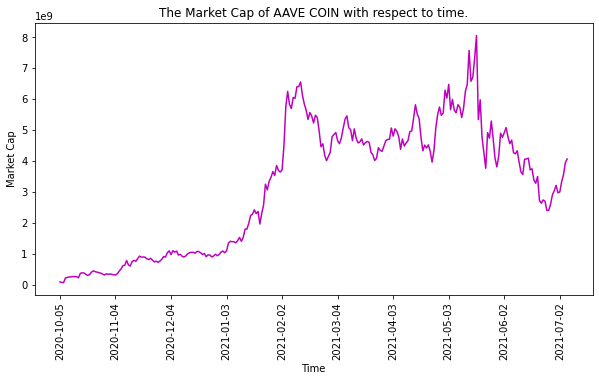

In [98]:
market_cap = cAave["Marketcap"]
plt.figure(figsize=(10,5))
plt.plot(dates,market_cap, color="m")
plt.xticks(dates[::tick],rotation="vertical")
plt.xlabel("Time")
plt.ylabel("Market Cap")
plt.title("The Market Cap of AAVE COIN with respect to time.")
plt.show()

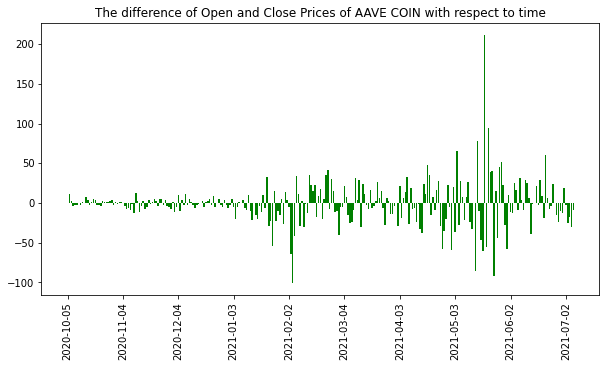

In [99]:
open_diff_close = cAave["Open"] - cAave["Close"]
plt.figure(figsize=(10,5))
plt.bar(dates, open_diff_close, color="green", linewidth=0.8)
plt.xticks(dates[::tick], rotation="vertical")
plt.title("The difference of Open and Close Prices of AAVE COIN with respect to time")
plt.show()

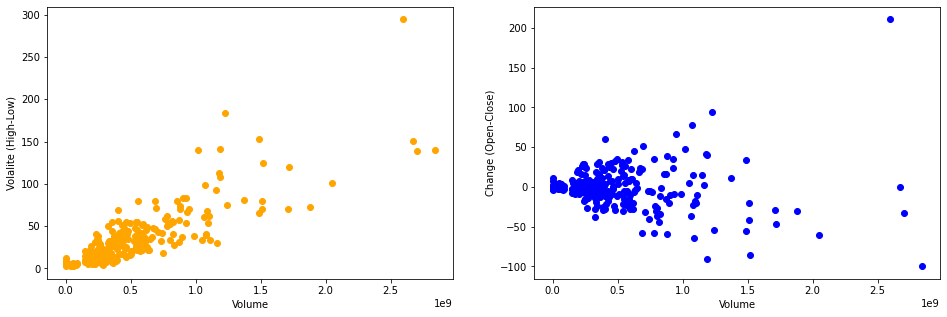

In [100]:
volalite = cAave["High"] - cAave["Low"]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.scatter(cAave_volume, volalite, color="orange")
ax2.scatter(cAave_volume, open_diff_close, color="blue")
ax1.set_xlabel("Volume")
ax1.set_ylabel("Volalite (High-Low)")
ax2.set_xlabel("Volume")
ax2.set_ylabel("Change (Open-Close)")
plt.show()
#There is a high correlation between Volalite/Change and Volume of AAVE COIN.

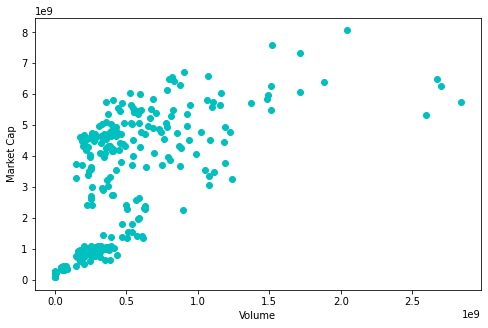

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(cAave_volume, market_cap, color="c")
plt.xlabel("Volume")
plt.ylabel("Market Cap")
plt.show()
#There is positive correlation between Market cap and Volume 

## ***Hypothesis Testing***

In this section, our purpose is to determine our hypothesis and test it and make inferences using sample data over the population. We will do it with three steps as below:

1.   **Determine Hypothesis**

2.   **Test Using Statistics**

3. **Find p-value and Conclude**


**Hypothesis:** The High volume results in price increase in market.<br>


In [192]:
main["changeRate"] = main["close_dif_open"] / main["Close"] * 100

In [193]:
population_mean = main['Volume'].mean() #the mean of volumes
population_std = np.std(main['Volume']) #the standart deviation of volumes
price_dif_mean = main["changeRate"].mean()
price_dif_mean

0.08150826088767425

In [194]:
sample_data = main[main["changeRate"] > price_dif_mean * 1.25]
sample_size = sample_data.shape[0]
sample_mean = sample_data["Volume"].mean()
sample_std = population_std / np.sqrt(sample_size)
offset = 4 * sample_std

In [195]:
z_score = (sample_mean - population_mean) / sample_std
z_score

-0.5743782093375259

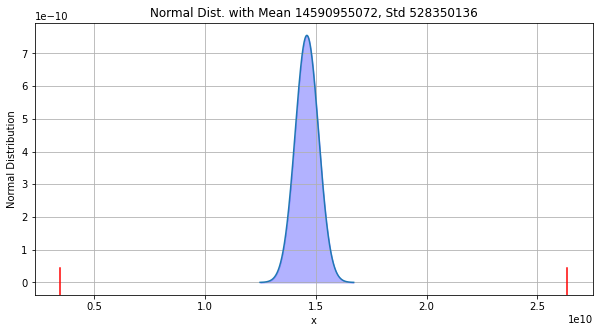

p value: 0.5657118953416017
probability: 56.57118953416017%


In [196]:
x = np.linspace(sample_mean - offset, sample_mean + offset, sample_size)
y = stats.norm.pdf(x,sample_mean, sample_std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.axvline(population_mean - z_score*population_std, ymax=0.1, color="red")
plt.axvline(population_mean + z_score*population_std, ymax=0.1, color="red")


plt.title(f"Normal Dist. with Mean {int(sample_mean)}, Std {int(sample_std)}")
plt.show()

prob = 2*stats.norm.cdf(z_score)
print(f"p value: {prob}")
print(f"probability: {prob*100}%")


<h3>In conclusion, we cannot reject null hypothesis since p value > 0.05. <br> However, we see that we cannot say whether volume has an effect on increase in market prices since our probability is 56%.

<h3>Hypothesis:
<h3>The opening price of a day is smaller than the closing price of the previous day.

In [197]:
main["prevday_diff"] = 0.0
for i in range(main["Close"].shape[0] - 1):
    main["prevday_diff"][i+1] = main["Open"][i + 1] - main["Close"][i]
smaller = main[main["prevday_diff"] < 0]["prevday_diff"]
larger = main[main["prevday_diff"] >= 0]["prevday_diff"]

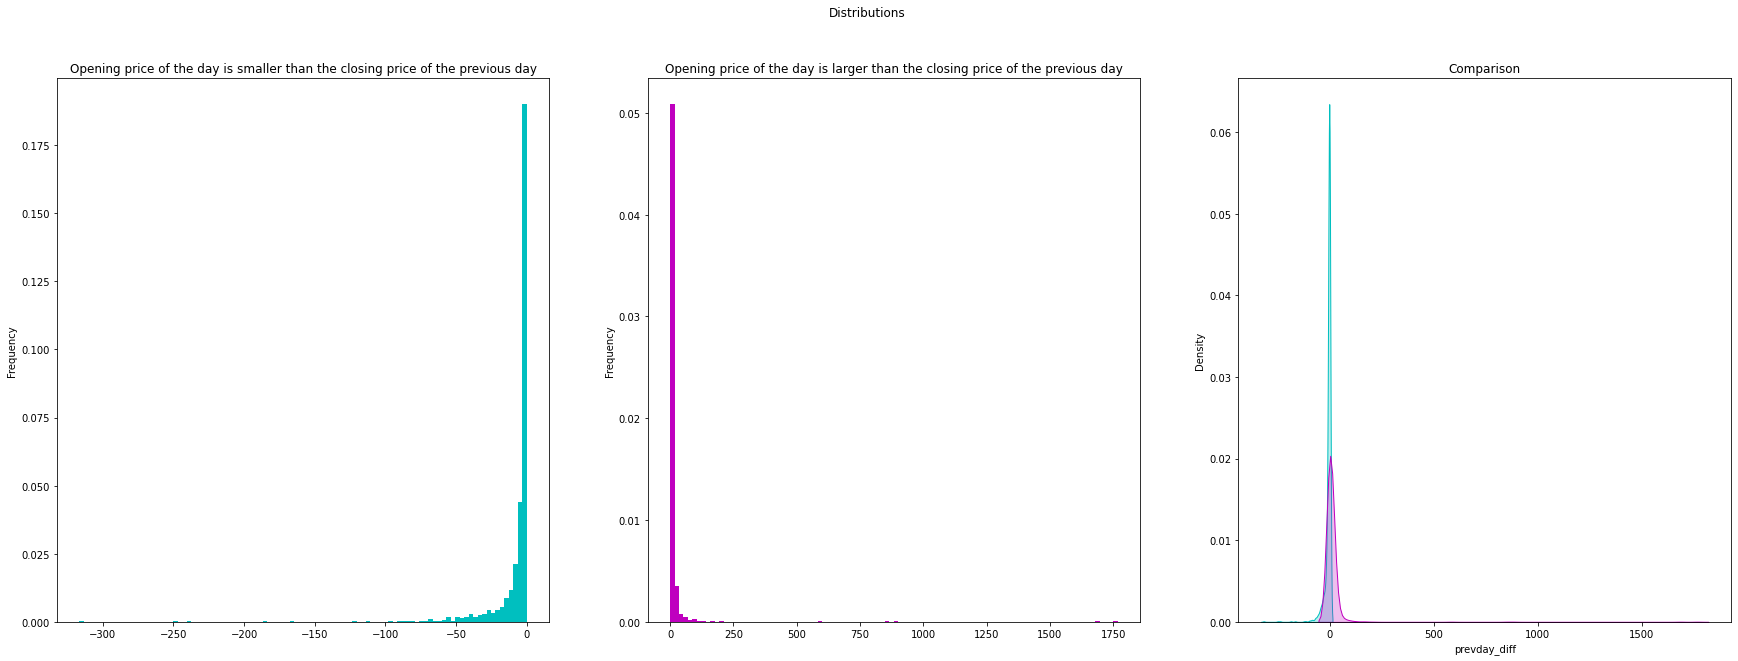

In [198]:
fig, ax = plt.subplots(1, 3, figsize=(30,10)) 
        
smaller.plot(kind="hist", ax=ax[0], bins=100, label="Smaller", color="c", density=True)
ax[0].set_title("Opening price of the day is smaller than the closing price of the previous day")

larger.plot(kind="hist", ax=ax[1], bins=100, label="Larger", color="m", density=True)
ax[1].set_title("Opening price of the day is larger than the closing price of the previous day")

sns.kdeplot(smaller, shade=True, label="Smaller", ax=ax[2], color="c")
sns.kdeplot(larger, shade=True, label="Larger", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Distributions")
plt.show()

# ***MACHINE LEARNING***


In [249]:
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## ***RANDOM FOREST MODEL***
<h2>In this part, we implemented a random forest model to predict the opening price of BTC by training various features.

<h3>In first part, we defined a function which takes a date input. We take the first 15 days of the previous 30 days of the given day, and try to predict remaining 15 days of it.

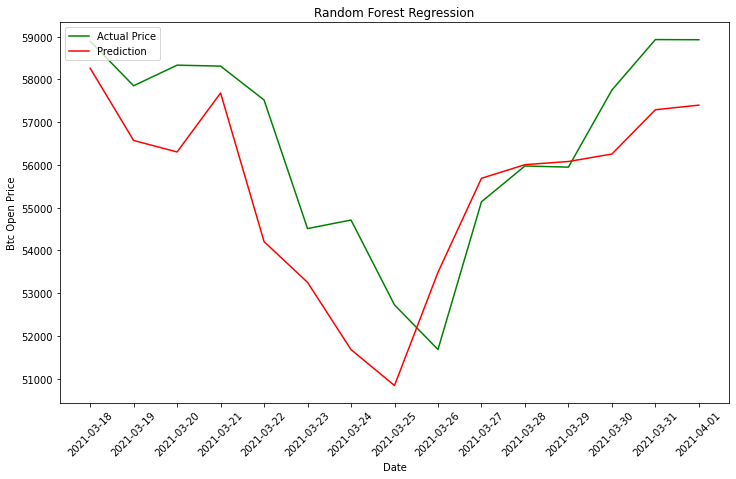

mse: 2844671.966716337
mae: 1415.5484088139885
rmse: 1686.6155361303704


In [231]:
def randomForestTrain15Test15(givenDay,df):
    features = ["Volume", "Close", "changeRate"]
    y = df["Open"]
    targetIdx = df[df["Date"] == givenDay].index[0]
    if targetIdx > 30:
        data = df[targetIdx-30: targetIdx]
        train_x = data[features][:15]
        train_y = data["Open"][:15]
        test_x = data[features][15:targetIdx]
        test_y = data["Open"][15:targetIdx]

        regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
        regressor.fit(train_x, train_y)

        predict_y = regressor.predict(test_x)
        plt.plot(data["Date"][15:targetIdx], test_y, color = 'green') 
        plt.plot(data["Date"][15:targetIdx], predict_y, color = 'red')
        plt.xticks(rotation="45")
        plt.title('Random Forest Regression')
        plt.xlabel('Date')
        plt.ylabel('Btc Open Price')
        plt.legend(["Actual Price", "Prediction"], loc ="upper left")
        plt.rcParams["figure.figsize"] = (12,7)

        plt.show()
        mse = mean_squared_error(test_y, predict_y)
        mae = mean_absolute_error(test_y, predict_y)
        rmse = np.sqrt(mse)

        print("mse: {}".format(mse))
        print("mae: {}".format(mae))
        print("rmse: {}".format(rmse))
    else:
        print("Invalid Date!")

        

randomForestTrain15Test15("2021-04-02",main)

<h3>In first part, we defined a function which takes a date input like the firs part; however, this time the function trains the previous 30 days of the given day, unlike first part, and tries to predict the opening price of BTC of the given day.

In [201]:
def randomForsestTrain30Predict31(givenDay,df):
    features = ["Volume", "Close", "changeRate"]
    y = df["Open"]
    targetIdx = df[df["Date"] == givenDay].index[0]
    if targetIdx > 30:
        data = df[targetIdx-30: targetIdx]
        
        train_x = data[features][:-1]
        train_y = data["Open"][:-1]
        test_x = data[features][29:]
        test_y = data["Open"][29:]

        regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
        regressor.fit(train_x, train_y)

        predict_y = regressor.predict(test_x)
        mse = mean_squared_error(test_y, predict_y)
        mae = mean_absolute_error(test_y, predict_y)
        rmse = np.sqrt(mse)

        print("mse: {}".format(mse))
        print("mae: {}".format(mae))
        print("rmse: {}".format(rmse))
        print("\nActual BTC price on {} : {}".format(givenDay, float(test_y)))
        print("Predicted BTC price on {} after training 30 days : {}".format(givenDay, predict_y[0]))
    else:
        print("Invalid Date")
        
randomForsestTrain30Predict31("2018-06-05",main)

mse: 63379.16877992567
mae: 251.75219717000618
rmse: 251.75219717000618

Actual BTC price on 2018-06-05 : 7722.529785
Predicted BTC price on 2018-06-05 after training 30 days : 7470.7775878299935


## ***LINEAR REGRESSION MODEL***
<h2>In this part, we created a linear regression model and train it with six years of data(2014-2022) that consists of the features below and we predict the opening prices of all days from the beginning of 2022 to the April of 2022.

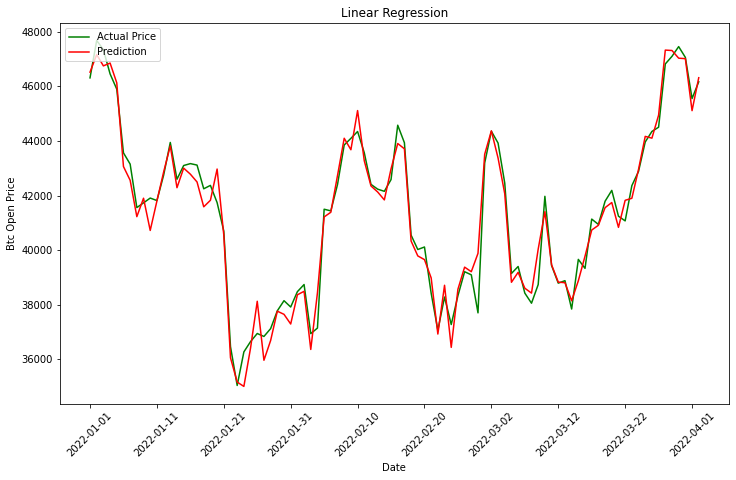

mse: 296199.0875032988
mae: 412.7576520082201
rmse: 544.2417546488865


In [230]:
features = ["Volume", "Close", "changeRate", "High", "Low", "Adj Close"]
training_data = main[main["Date"] < "2022-01-01"]
x_train = training_data[features]
y_train = training_data["Open"]

test_data = main[main["Date"] >= "2022-01-01"]
x_test = test_data[features]
y_test = test_data["Open"]

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

predict_y = linear_model.predict(x_test)

plt.plot(test_data["Date"], y_test, color = 'green') 
plt.plot(test_data["Date"], predict_y, color = 'red')
plt.xticks(rotation="45")
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Btc Open Price')
plt.legend(["Actual Price", "Prediction"], loc ="upper left")
plt.rcParams["figure.figsize"] = (12,7)
plt.xticks(test_data["Date"][::10], rotation="45")
plt.show()
mse = mean_squared_error(y_test, predict_y)
mae = mean_absolute_error(y_test, predict_y)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))